## Quality Assessment

To have high-quality data, I want to follow these 4 steps:


🧩 **Step 1**: Define the pandas display format.

🧩 **Step 2**: Exclude unwanted orders.

🧩 **Step 3**: Exclude orders with unknown products.

🧩 **Step 4**: Explore the revenue from different tables.

🧩 **Step 5**: Become confident about your dataset.

### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1. Defined Pandas display formats

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

### Step2. Exclude unwanted orders


*Let's import our data*

In [5]:
orders = pd.read_csv("C:\\My projects\\pandas\\cleaned_data\\orders_cleaned")
orderlines = pd.read_csv("C:\\My projects\\pandas\\cleaned_data\\orderlines_cleaned")
products = pd.read_csv("C:\\My projects\\pandas\\cleaned_data\\products_cleaned")
brands = pd.read_csv("C:\\My projects\\pandas\\cleaned_data\\brands_cleaned")

*When we want to remove or manipulate data, or when we need to merge tables, we should have domain knowledge about the data or consult someone who is an expert in the business concepts.*

Here’s a description of each table and its columns:

**orders.csv** – Every row in this file represents an order.

`order_id` – a unique identifier for each order

`created_date` – a timestamp for when the order was created

`total_paid` – the total amount paid by the customer for this order, in euros
state 

`“Shopping basket”` – products have been placed in the shopping basket

`“Place Order”` – the order has been placed, but is awaiting shipment details 

`“Pending”` – the order is awaiting payment confirmation

`“Completed”` – the order has been placed and paid, and the transaction is completed.

`“Cancelled”` – the order has been cancelled and the payment returned to the customer.

**orderlines.csv** – Every row represents each one of the different products involved in an order.

`id` – a unique identifier for each row in this file

`id_order` – corresponds to orders.order_id

`product_id` – an old identifier for each product, nowadays not in use

`product_quantity`– how many units of that product were purchased on that order

`sku` – stock keeping unit: a unique identifier for each product

`unit_price` – the unitary price (in euros) of each product at the moment of placing that order

`date` – timestamp for the processing of that product

**products.csv**

`sku` – stock keeping unit: a unique identifier for each product

`name` – product name

`desc` – product description

`price` – base price of the product, in euros

`promo_price` – promotional price, in euros

`in_stock` – whether or not the product was in stock at the moment of the data extraction

`type` – a numerical code for product type

**brands.csv**

`short` – the 3-character code by which the brand can be identified in the first 3 characters of products.sku
`long` – brand name

In [17]:
orders.sample(10)

,order_id,created_date,total_paid,state
165232,465536,2017-12-18 11:37:46,149.99,Shopping Basket
194467,494955,2018-01-20 10:39:38,481.98,Completed
52061,351556,2017-05-01 16:52:26,114.96,Shopping Basket
48281,347774,2017-04-20 12:32:48,36.99,Cancelled
100057,399641,2017-09-13 15:13:12,49.99,Shopping Basket
11832,311307,2017-01-17 23:50:35,3.99,Place Order
129820,429438,2017-11-20 17:35:05,0.00,Shopping Basket
219028,519524,2018-03-01 16:44:06,389.58,Shopping Basket
189672,490157,2018-01-13 15:48:51,34.98,Completed
197075,497564,2018-01-24 10:31:17,25.99,Shopping Basket


Look at column `state`. Some of the orders present in the dataset were left in the shopping cart or cancelled.
As the first step of data cleaning, we should consider excluding them so that, when we analyse the dataset, we deal with **actual purchases** from which the company is making **actual money**. 
Analysing why some orders were cancelled could be very importatnt, but it is out of the scope of this project.

In [7]:
orders['state'].unique()

array(['Cancelled', 'Completed', 'Pending', 'Shopping Basket',
       'Place Order'], dtype=object)

In [9]:
state_filter = orders['state'] == 'Completed'

In [11]:
orders = orders.loc[state_filter, : ]

In [14]:
orders.head()

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed


In [98]:
orders['state'].unique()

array(['Completed'], dtype=object)

Secondly, we should make sure that orders in the dataset are in both `orders` and `orderlines`.

But **why is it important?**

Because we might consider orders that do not have products associated with them or products sold without an order that links them with the customers and sellers involved.

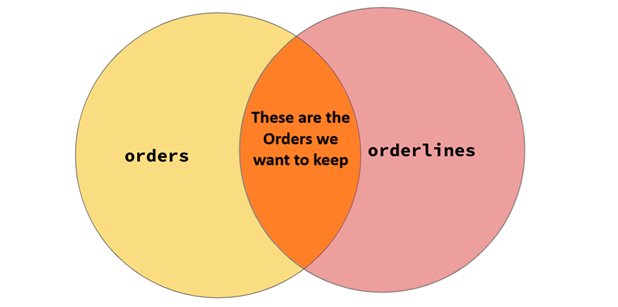

*We should do these steps:*

1: About `orderlines` we should keep only orders present in `orders`

2: About `orders` we should keep only orders present in `orderlines`

In [69]:
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [13]:
# We know that:
# id_order corresponds to orders.order_id

common_products = orders.merge(orderlines,
                               left_on = 'order_id',
                               right_on = 'id_order',
                               how = 'inner')

In [102]:
common_products.head()

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44
3,245275,2017-06-28 11:35:37,149.00,Completed,1276706,245275,0,1,TAD0007,149.00,2017-06-28 11:12:30
4,245595,2017-01-21 12:52:47,112.97,Completed,1154394,245595,0,2,PAC1561,52.99,2017-01-21 12:49:00


In [104]:
common_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62103 entries, 0 to 62102
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          62103 non-null  int64  
 1   created_date      62103 non-null  object 
 2   total_paid        62103 non-null  float64
 3   state             62103 non-null  object 
 4   id                62103 non-null  int64  
 5   id_order          62103 non-null  int64  
 6   product_id        62103 non-null  int64  
 7   product_quantity  62103 non-null  int64  
 8   sku               62103 non-null  object 
 9   unit_price        62103 non-null  float64
 10  date              62103 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 5.2+ MB


### Step 3. Exclude orders with unknown products

The `products` table should be the primary reference for all the products being sold. It is likely that, during the Data Cleaning phase, we deleted many rows from products.

Any order involving products not present there is susceptible to containing corrupted information.

I want to delete all of the potentially corrupted rows.

In [108]:
products.head()

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.90,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,590.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,569.90,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,230.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [112]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10477 entries, 0 to 10476
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          10477 non-null  object 
 1   name         10477 non-null  object 
 2   desc         10477 non-null  object 
 3   price        10477 non-null  float64
 4   promo_price  10477 non-null  float64
 5   in_stock     10477 non-null  int64  
 6   type         10477 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 573.1+ KB


In [15]:
all_tables = common_products.merge(products,
                                   on = 'sku',
                                   how = 'inner')

In [20]:
all_tables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61693 entries, 0 to 61692
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          61693 non-null  int64  
 1   created_date      61693 non-null  object 
 2   total_paid        61693 non-null  float64
 3   state             61693 non-null  object 
 4   id                61693 non-null  int64  
 5   id_order          61693 non-null  int64  
 6   product_id        61693 non-null  int64  
 7   product_quantity  61693 non-null  int64  
 8   sku               61693 non-null  object 
 9   unit_price        61693 non-null  float64
 10  date              61693 non-null  object 
 11  name              61693 non-null  object 
 12  desc              61693 non-null  object 
 13  price             61693 non-null  float64
 14  promo_price       61693 non-null  float64
 15  in_stock          61693 non-null  int64  
 16  type              61693 non-null  object

### Step 4. Explore the revenue from different tables

All three tables we have seen (products, orderlines and orders) contain information about prices. 

Shouldn’t this information match? Well… yes and no. 

Let's have a look to **price columns**:
 
`products.price` : This is the original price of a product, **without any discount or promotion**.

`orderlines.unit_price` : This is the **actual price** at which a product has been **sold**. It should roughly match the price in the `products` table, but there might be deviations, as discounts get applied here.

`orders.total_paid` : This is the total amount of the **full order**. It should roughly translate to the sum of all unitary prices, multiplied by the amount of each product purchased (**orderlines.product_quantity**).

The key word here is, again, roughly: 

The total amount of the order might include shipping costs or vouchers.

In fact, we should ask ourselves the following questions:

**1 - What is the average difference between total_paid and unit_price_total?**

**2- What is the distribution of these differences?**

**3- Can all the differences be explained by shipping costs? If not, what are other plausible explanations?**

**4- If there are differences that cannot be explained, what should be done with these orders?**

In [17]:
all_tables.loc[: , ['sku', 'product_quantity','unit_price','price', 'total_paid' ]].head()

,sku,product_quantity,unit_price,price,total_paid
0,LAC0212,1,129.16,139.99,136.15
1,PAR0074,1,10.77,17.99,15.76
2,OWC0074,1,77.99,99.99,84.98
3,TAD0007,1,149.00,179.00,149.00
4,PAC1561,2,52.99,103.95,112.97


#### 1: checking `price` & `unit_price`

I know that `price` and `unit_price` are rughly matched. 

I want to allow a maximum discount of 99% for the product. If there is a difference of more than 99% between the actual price (unit_price) and the original price (price), I will consider these cases as outliers and remove them.

In [19]:
mask1 = (all_tables['price'] - 0.99 * (all_tables['price'])) > (all_tables['unit_price'])

In [21]:
all_tables.loc[mask1, ['sku', 'product_quantity','unit_price','price', 'total_paid', 'promo_price' ]].shape[0]

293

It does not make sense for us to apply more than a 99% discount on our products.

Let's remove these 293 rows.


In [23]:
all_tables = all_tables.loc[~mask1, :]

In [25]:
all_tables .info()

<class 'pandas.core.frame.DataFrame'>
Index: 61400 entries, 0 to 61692
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          61400 non-null  int64  
 1   created_date      61400 non-null  object 
 2   total_paid        61400 non-null  float64
 3   state             61400 non-null  object 
 4   id                61400 non-null  int64  
 5   id_order          61400 non-null  int64  
 6   product_id        61400 non-null  int64  
 7   product_quantity  61400 non-null  int64  
 8   sku               61400 non-null  object 
 9   unit_price        61400 non-null  float64
 10  date              61400 non-null  object 
 11  name              61400 non-null  object 
 12  desc              61400 non-null  object 
 13  price             61400 non-null  float64
 14  promo_price       61400 non-null  float64
 15  in_stock          61400 non-null  int64  
 16  type              61400 non-null  object 
dty

#### 2: checking `total_paid`

This is the total amount of the full order. It should roughly translate to the sum of all unitary prices, multiplied by the amount of each product purchased (orderlines.product_quantity).

The key word here is, again, roughly:

The total amount of the order might include shipping costs or vouchers.

In [27]:
all_tables.loc[: , 'quant_price'] = (all_tables['product_quantity']* all_tables['unit_price'])

In [29]:
all_tables.loc[:, 'shipping_vochers'] = abs((all_tables['total_paid']) -(all_tables['quant_price']))

In [31]:
all_tables.loc[:, ['total_paid','quant_price' ,'shipping_vochers', 'product_quantity', 'unit_price' ]].sort_values(by = 'shipping_vochers' , ascending = False).head()

,total_paid,quant_price,shipping_vochers,product_quantity,unit_price
10077,9987.76,63.20,9924.56,1,63.20
10074,9987.76,429.00,9558.76,1,429.00
10076,9987.76,429.60,9558.16,3,143.20
9882,9423.90,6.99,9416.91,1,6.99
9887,9423.90,23.99,9399.91,1,23.99


##### Let's consider maximum 30% of `total_paid` of each product as (shipping/vocher).

In [43]:
mask1 = (all_tables['shipping_vochers']) >  (1.3 * all_tables['total_paid'])

In [45]:
all_tables.loc[mask1 ,['total_paid','quant_price' ,'shipping_vochers']].shape[0]

17

*Let's remove them*

In [54]:
all_tables = all_tables.loc[~mask1, :]

In [56]:
all_tables.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61383 entries, 0 to 61692
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          61383 non-null  int64  
 1   created_date      61383 non-null  object 
 2   total_paid        61383 non-null  float64
 3   state             61383 non-null  object 
 4   id                61383 non-null  int64  
 5   id_order          61383 non-null  int64  
 6   product_id        61383 non-null  int64  
 7   product_quantity  61383 non-null  int64  
 8   sku               61383 non-null  object 
 9   unit_price        61383 non-null  float64
 10  date              61383 non-null  object 
 11  name              61383 non-null  object 
 12  desc              61383 non-null  object 
 13  price             61383 non-null  float64
 14  promo_price       61383 non-null  float64
 15  in_stock          61383 non-null  int64  
 16  type              61383 non-null  object 
 17

*Now, I want to extract `products` ,`orders` and `orderlines` from common_products*

In [58]:
orders.columns

Index(['order_id', 'created_date', 'total_paid', 'state'], dtype='object')

In [60]:
orderlines.columns

Index(['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date'],
      dtype='object')

In [62]:
products.columns

Index(['sku', 'name', 'desc', 'price', 'promo_price', 'in_stock', 'type'], dtype='object')

In [64]:
orders = all_tables.loc[: , ['order_id', 'created_date', 'total_paid', 'state']]
orderlines = all_tables.loc[: , ['id', 'id_order', 'product_id', 'product_quantity', 'sku', 'unit_price',
       'date']]
products = all_tables.loc[: , ['sku', 'name', 'desc', 'price', 'promo_price', 'in_stock', 'type']]

In [66]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61383 entries, 0 to 61692
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      61383 non-null  int64  
 1   created_date  61383 non-null  object 
 2   total_paid    61383 non-null  float64
 3   state         61383 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [68]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61383 entries, 0 to 61692
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                61383 non-null  int64  
 1   id_order          61383 non-null  int64  
 2   product_id        61383 non-null  int64  
 3   product_quantity  61383 non-null  int64  
 4   sku               61383 non-null  object 
 5   unit_price        61383 non-null  float64
 6   date              61383 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 3.7+ MB


In [70]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61383 entries, 0 to 61692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          61383 non-null  object 
 1   name         61383 non-null  object 
 2   desc         61383 non-null  object 
 3   price        61383 non-null  float64
 4   promo_price  61383 non-null  float64
 5   in_stock     61383 non-null  int64  
 6   type         61383 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.7+ MB


Now, I want to extract the months and years from `created_date` because it helps me interpret the effect of seasonality and special days on sales.

In [73]:
orders['month'] = orders['created_date'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

What is this error?

Let's check `orders.info()`

In [75]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61383 entries, 0 to 61692
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      61383 non-null  int64  
 1   created_date  61383 non-null  object 
 2   total_paid    61383 non-null  float64
 3   state         61383 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


If you remember, in the previous notebook (cleaning), we changed the data type of `created_date` to datetime. However, now it has become "object". Why is that?

This happens because, when we save the cleaned data (most likely as a CSV), Pandas includes the index from the original DataFrame as a column by default. When we load the data back into another Jupyter notebook, Pandas interprets that column as regular data instead of the index.

This issue occurs because when we save the DataFrame as a CSV file and then load it back, Pandas may not preserve the datetime64 data type by default.

Instead, it treats the created_date column as an "object" (which is typically a string), losing its original datetime64[ns] format.

**Why this happens**:

When we save the DataFrame as a CSV, the datetime column is converted into a string format (since CSVs store data as text).

When we load the CSV back, Pandas does not automatically convert the string back into a datetime object unless explicitly instructed to do so.








**How to fix it**:

We convert the created_date column back to datetime after loading the CSV

In [77]:
orders['created_date'] = pd.to_datetime(orders['created_date'])

In [79]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61383 entries, 0 to 61692
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      61383 non-null  int64         
 1   created_date  61383 non-null  datetime64[ns]
 2   total_paid    61383 non-null  float64       
 3   state         61383 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [81]:
orders['month'] = orders['created_date'].dt.month_name()

In [83]:
orders['year'] = orders['created_date'].dt.year

In [85]:
orders.head()

,order_id,created_date,total_paid,state,month,year
0,241423,2017-11-06 13:10:02,136.15,Completed,November,2017
1,242832,2017-12-31 17:40:03,15.76,Completed,December,2017
2,243330,2017-02-16 10:59:38,84.98,Completed,February,2017
3,245275,2017-06-28 11:35:37,149.00,Completed,June,2017
4,245595,2017-01-21 12:52:47,112.97,Completed,January,2017


In [87]:
orders.drop('created_date' , axis = 1, inplace = True)

In [89]:
orders.head()

,order_id,total_paid,state,month,year
0,241423,136.15,Completed,November,2017
1,242832,15.76,Completed,December,2017
2,243330,84.98,Completed,February,2017
3,245275,149.00,Completed,June,2017
4,245595,112.97,Completed,January,2017


#### 2: orderlines

In [93]:
orderlines.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20
1,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40
2,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44
3,1276706,245275,0,1,TAD0007,149.00,2017-06-28 11:12:30
4,1154394,245595,0,2,PAC1561,52.99,2017-01-21 12:49:00


We have these information:

1- `product_id` is an old identifier for each product, nowadays not in use.

2- `id` is a unique identifier for each row in this file

3- `date` is timestamp for the processing of that product


For this analysis I don't need timestamp of processing, so very simple I delete these columns



In [96]:
orderlines.drop(columns= ['product_id', 'id', 'date'] , inplace = True)

In [98]:
orderlines.head()

,id_order,product_quantity,sku,unit_price
0,241423,1,LAC0212,129.16
1,242832,1,PAR0074,10.77
2,243330,1,OWC0074,77.99
3,245275,1,TAD0007,149.00
4,245595,2,PAC1561,52.99


This thable also is good. Now, I want to save them as `quality_data`

In [41]:
orders.to_csv(f'C:\\My projects\\pandas\\quality_data\\orders_q', index = False)
order_lines.to_csv(f'C:\\My projects\\pandas\\quality_data\\orderlines_q', index = False)
products.to_csv(f'C:\\My projects\\pandas\\quality_data\\products_q', index = False)
brands.to_csv(f'C:\\My projects\\pandas\\quality_data\\brands_q', index = False)